<h1 align='center'> 영상처리 프로그래밍 실습 3</h1>

<h6 align='right'> 2022. 3. 24. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 30일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 예제 1. 영상의 반전

###  8-비트 양자화 흑백 영상의 반전

한 화소가 8-비트로 양자화된 2차원 흑백 영상 $f(x,y)$의 반전 영상 $g(x,y)$는 다음과 같이 표현된다.

$$g(x,y) = 255 - f(x,y)$$

'tree-1.jpg' 파일을 읽고, 흑백 영상으로 변환한 후에 흑백영상과 이 흑백영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.

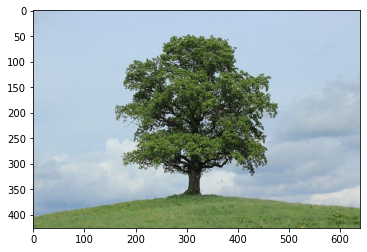

In [2]:
img = mpimg.imread('tree-1.jpg')
plt.imshow(img)
plt.show()


In [3]:
img = cv2.imread('tree-1.jpg')

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
img.shape, img_gray.shape

((426, 640, 3), (426, 640))

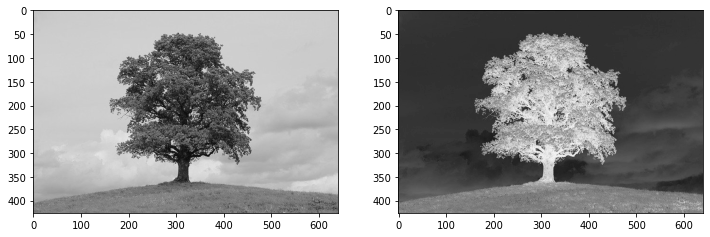

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(255-img_gray, cmap='gray')

### 컬러 영상의 반전

'tree-1.jpg' 파일을 읽고, 이 영상과 이 영상의 반전 영상을 화면에 나란히 표시하는 프로그램을 작성하라.


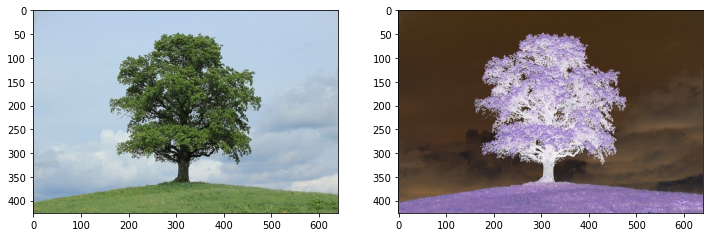

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(255-img[:,:,::-1])

## 예제 2. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백 영상을 표시하고, 오른쪽 마우스를 누르면 컬러 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [2]:
def onMouseColorGray(event, x, y, flags, param):
    # Local namespace
    #main body namespace 에 있는 매개변수는 readOnly
    if event == cv2.EVENT_LBUTTONUP:
        cv2.imshow(winName, img_gray)
    elif event == cv2.EVENT_RBUTTONUP:
        cv2.imshow(winName, img)

# main body namespace
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGray)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()



In [3]:
cv2dir = dir(cv2)
[e for e in cv2dir if 'EVENT' in e]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

## 예제 3. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭하면 흑백반전 영상을 표시하고, 오른쪽 마우스를 누르면 원 영상을 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [6]:
def onMouseGrayInvert(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP: #왼쪽 마우스 버튼이 떼지면
        cv2.imshow(winname, img_gray_inv) #흑백반전 영상 표시
    elif event == cv2.EVENT_RBUTTONUP: #오른쪽 마우스 버튼이 떼지면
        cv2.imshow(winname, img) #원래 영상(컬러 영상) 표시

img = cv2.imread("tree-1.jpg") #이미지를 불러와서 img에 저장하고
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #img의 흑백영상을 img_gray에 저장
img_gray_inv = 255 - img_gray #img_gray의 흑백반전 영상을 img_gray_inv에 저장

winname = "color & gray Invert" #윈도우 이름
cv2.imshow(winname, img) #윈도우에 img 영상을 띄우고
cv2.setMouseCallback(winname, onMouseGrayInvert) #마우스 버튼 클릭을 받는 함수
while cv2.waitKey(0) != ord('q'): # q가 입력되기 전까지는 무한루프
    pass
cv2.destroyAllWindows() #q가 입력되어 무한루프를 빠져나오면 모든 윈도우창을 끈다

## 예제 4. 

tree-1.jpg 파일을 읽고, cv2.imshow 함수를 이용하여 영상을 새 윈도우에 표시하고, 왼쪽 마우스 버튼을 클릭할 때마다 흑백 영상과 흑백 반전 영상을 번갈아 가면서 표시하고, 오른쪽 마우스 버튼을 클릭할 때마다 컬러 영상과 컬러 반전 영상을 번갈아 가면서 표시하고, 'q'를 입력하면 프로그램을 종료하는 프로그램을 작성하라.

In [5]:
def onMouseColorGrayInvert(event, x, y, flags, param):
    # local namespace
    global gray_mode, color_mode
    if event == cv2.EVENT_LBUTTONUP:
        if gray_mode == 'NORMAL':
            cv2.imshow(winName, img_gray_inv)
            gray_mode = 'INVERT'
        elif gray_mode == 'INVERT':
            cv2.imshow(winName, img_gray)
            gray_mode = 'NORMAL'
    elif event == cv2.EVENT_RBUTTONUP:
        if color_mode == 'NORMAL':
            cv2.imshow(winName, img_inv)
            color_mode = 'INVERT'
        elif color_mode == 'INVERT':
            cv2.imshow(winName, img)
            color_mode = 'NORMAL'

# main body namespace
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inv = 255 - img
img_gray_inv = 255 - img_gray

color_mode = 'NORMAL'
gray_mode = 'NORMAL'

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGrayInvert)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()

## Global변수 대신에 parameter사용하기

In [3]:
def onMouseColorGrayInvert(event, x, y, flags, param):
    # Local namespace
    #main body namespace 에 있는 매개변수는 readOnly
    #가능한 한 global변수는 사용하지 않는 것이 좋다
    if event == cv2.EVENT_LBUTTONUP:
        if param[0] == 'NORMAL':
            cv2.imshow(winName, img_gray_inv)
            param[0] = 'INVERT'
        elif param[0] == 'INVERT':
            cv2.imshow(winName, img_gray)
            param[0] = 'NORMAL'
    elif event == cv2.EVENT_RBUTTONUP:
        if param[1] == 'NORMAL':
            cv2.imshow(winName, img_inv)
            param[1] = 'INVERT'
        elif param[1] == 'INVERT':
            cv2.imshow(winName, img)
            param[1] = 'NORMAL'

# main body namespace
img = cv2.imread('tree-1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inv = 255 - img
img_gray_inv = 255 - img_gray

mode = ['NORMAL', 'NORMAL']

winName = 'color & gray'
cv2.imshow(winName, img)
cv2.setMouseCallback(winName, onMouseColorGrayInvert, param=mode)
while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()


## Weighted sum of two images

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

## 예제 5: 지난 주 문제 1.

가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 4 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.

영상의 순서는 tree-1 --> tree-2 --> tree-3 --> tree-4 --> tree-1

단, 영상과 영상 사이의 디스플레이 간격은 0.5초로 설정하라.


In [13]:
img_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')

#img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)
cv2.waitKey(0)

images = [img_tree1, img_tree2, img_tree3, img_tree4, img_tree1]
for n in range(len(images)-1):
    for alpha in np.arange(1, -0.01, -0.01):
        img = (images[n] * alpha + images[n+1] * (1-alpha)).astype(np.uint8)
        cv2.imshow(winname, img)
        cv2.waitKey(500)
cv2.destroyAllWindows()


## 예제 6.

OpenCV의 waitKey 함수를 이용하여 예제 1에서 영상이 변화 과정을 반수동으로 변경할 수 있도록 프로그램을 수정하라.

단, 입력한 키에 따른 동작은 다음과 같다.

- '1': $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- '2': $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- '3': $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- '4': $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1
- 'q': 프로그램 종료



In [4]:
def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = ((1-alpha)*img_tree1 + alpha*img_tree2).astype(np.uint8)
    elif n < 200:
        alpha = (n-100) / 100
        img = ((1-alpha)*img_tree2 + alpha*img_tree3).astype(np.uint8)
    elif n < 300:
        alpha = (n-200) / 100
        img = ((1-alpha)*img_tree3 + alpha*img_tree4).astype(np.uint8)
    else:
        alpha = (n-300) / 100
        img = ((1-alpha)*img_tree4 + alpha*img_tree1).astype(np.uint8)
    cv2.imshow(winname, img)

img_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')

winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)


while True:
    key_in = cv2.waitKey(0)
    start = 0 
    if key_in == ord('q'):
        break
    elif key_in == ord('1'):
        start = 0
        N = 100
    elif key_in == ord('2'):
        start = 100
        N = 200
    elif key_in == ord('3'):
        start = 200
        N = 300
    elif key_in == ord('4'):
        start = 300
        N = 400

    for n in range(start, N):
        cv2.waitKey(10)
        mix_images(n)

cv2.destroyAllWindows()

<function destroyAllWindows>

## 예제 7.

OpenCV의 trackbar를 사용하여 예제 1에서 영상이 변화 과정을 수동으로 변경할 수 있도록 프로그램을 수정하라.

단, Trackbar의 범위를 0부터 400까지 설정하고, trackbar에서 1이 변하면 $\alpha$ 값이 0.01이 변하도록 변환하라. trackbar의 변환 범위는 다음과 같다.

- Trackbar $= 0 \rightarrow 100$:   $\alpha = 0. \rightarrow 1.00$,  tree-1 $\rightarrow$ tree-2
- Trackbar $= 100 \rightarrow 200$: $\alpha = 0. \rightarrow 1.00$,  tree-2 $\rightarrow$ tree-3
- Trackbar $= 200 \rightarrow 300$: $\alpha = 0. \rightarrow 1.00$,  tree-3 $\rightarrow$ tree-4
- Trackbar $= 300 \rightarrow 400$: $\alpha = 0. \rightarrow 1.00$,  tree-4 $\rightarrow$ tree-1

그리고 'q'를 누르면 프로그램이 종료되어야 한다.

In [7]:
def mix_images(n):
    if 0 <= n < 100:
        alpha = n / 100
        img = ((1-alpha)*img_tree1 + alpha*img_tree2).astype(np.uint8)
    elif n < 200:
        alpha = (n-100) / 100
        img = ((1-alpha)*img_tree2 + alpha*img_tree3).astype(np.uint8)
    elif n < 300:
        alpha = (n-200) / 100
        img = ((1-alpha)*img_tree3 + alpha*img_tree4).astype(np.uint8)
    else:
        alpha = (n-300) / 100
        img = ((1-alpha)*img_tree4 + alpha*img_tree1).astype(np.uint8)
    cv2.imshow(winname, img)
    
    

img_tree1 = mpimg.imread('tree-1.jpg')
img_tree2 = mpimg.imread('tree-2.jpg')
img_tree3 = mpimg.imread('tree-3.jpg')
img_tree4 = mpimg.imread('tree-4.jpg')

#img = img_tree1.copy()
winname = "Weighted Sum of images"
cv2.imshow(winname, img_tree1)

cv2.createTrackbar('step', winname, 0, 400, mix_images)

while cv2.waitKey(0) != ord('q'):
    pass
cv2.destroyAllWindows()



## 예제 8. 영상 자르기

In [9]:
file_name = 'bird.png'
img = cv2.imread(file_name)
img.shape

(425, 640, 3)

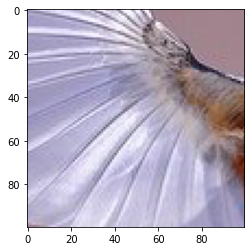

In [10]:
plt.imshow(img[100:200,100:200,::-1])

In [11]:
img_new = cv2.rectangle(img, (300, 150), (450, 250), (255,255,255))

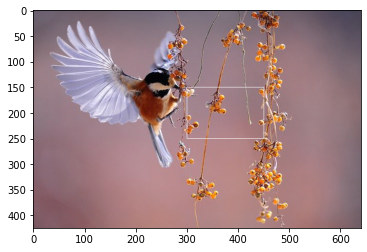

In [12]:
plt.imshow(img_new[:,:,::-1])

## 문제 1.

예제 8의 프로그램을 다음과 같이 수정하라.

1. 'Image' 윈도우에서 마우스 왼쪽 버튼을 클릭하면 그 위치가 하얀색 창의 왼쪽 위 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

2. 'Image' 윈도우에서 마우스 오른쪽 버튼을 클릭하면 그 위치가 하얀색 창의 오른쪽 아래 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

3. 'Cropped' 윈도우에서 왼쪽 마우스 버튼을 클릭하면 사용자에게 저장할 파일 이름을 입력받아서 'Cropped' 윈도우에 표시된 영상 부분을 별도의 파일로 저장한다.

In [9]:
def onMouseClick(event, x, y, flags, param): # "Image"윈도우에서 마우스 클릭 이벤트를 처리하는 함수
    global leftUp_x, leftUp_y, rightDown_x, rightDown_y, leftDown, rightDown, img_new

    if(event == cv2.EVENT_LBUTTONUP): #왼쪽 마우스 버튼 클릭시
        leftUp_x = x # x좌표 저장   
        leftUp_y = y # y좌표 저장
        leftDown = True # 왼쪽 마우스 버튼이 눌렸는지 확인
    elif(event == cv2.EVENT_RBUTTONUP): #오른쪽 마우스 클릭시
        rightDown_x = x 
        rightDown_y = y
        rightDown = True # 오른쪽 마우스 버튼이 눌렸는지 확인
    if(leftDown & rightDown): #왼쪽 마우스 버튼과 오른쪽 마우스 버튼이 모두 눌렸으면
        img_new = cv2.rectangle(img, (leftUp_x, leftUp_y), (rightDown_x, rightDown_y), (255,255,255)) #저장한 좌표를 이용해 rectangle 표시한 후 img_new에 이미지 저장
        cv2.imshow(winname, img_new) # 흰생창을 포함한 img_new를 image윈도우에 표시
        img_new = img[leftUp_y:rightDown_y,leftUp_x:rightDown_x] #흰생창에 포함된 영상을 img_new에 저장 -> Cropped 윈도우 클릭시 영상저장에 이용
        cv2.imshow(winname_new,img_new) # 'Chropped'윈도우에 img_new 이미지 표시
        cv2.setMouseCallback(winname_new, onMouseClickSave) # 'Chropped'윈도우에서의 마우스콜백
        #변수 다시 초기화
        leftUp_x = 0 
        leftUp_y = 0
        rightDown_x = 0 
        rightDown_y = 0
        leftDown = False
        rightDown = False

def onMouseClickSave(event, x, y, flags, param): # 'Cropped'윈도우 에서의 마우스 클릭 이벤트를 처리하는 함수
    save_filename = "" # 저장할 파일 이름
    if(event == cv2.EVENT_LBUTTONUP): # 왼쪽 버튼을 누르면
        save_filename = input("파일 이름 : ") + ".png" #저장할 파일 이름을 입력받고
        cv2.imwrite(save_filename, img_new) # cv2.imwrite("저장할 파일 이름", 이미지)함수를 이용해 이미지 저장

file_name = 'bird.png'
img = cv2.imread(file_name)
img_new = img
winname = 'Image'
winname_new = 'Cropped'

leftUp_x = 0 
leftUp_y = 0
rightDown_x = 0 
rightDown_y = 0
leftDown = False
rightDown = False

cv2.imshow(winname, img)
cv2.setMouseCallback(winname, onMouseClick)
cv2.waitKey(0)
cv2.destroyAllWindows()


True